In [4]:
import pandas as pd 
import numpy as np 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from langcodes import Language
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

In [5]:
df = pd.read_csv("data/restaurant_reviews_.csv")

In [6]:
df.head()

,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,restaurant_url,extracted_info,Name,Address
0,ChdDSUhNMG9nS0VJQ0FnTUNvZ2FEbjBRRRAB,Different experience Excellent service Delicio...,2 days ago,2025-04-20 10:13:22.760797,5.0,Moez Krir,9,https://www.google.com/maps/contrib/1005837949...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
1,ChZDSUhNMG9nS0VJQ0FnTUNvcVBlMVVREAE,What a hidden gem! Food and ambience of the pl...,5 days ago,2025-04-20 10:13:22.761653,5.0,Daniel Tam,70,https://www.google.com/maps/contrib/1021915399...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
2,ChdDSUhNMG9nS0VJQ0FnTURJcDgzNXZRRRAB,During our stay we had the opportunity to eat ...,6 days ago,2025-04-20 10:13:22.762593,5.0,Marion Bénard,0,https://www.google.com/maps/contrib/1100664059...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
3,ChZDSUhNMG9nS0VJQ0FnTURJMWFMalNREAE,"Always well received in this restaurant, it is...",a week ago,2025-04-20 10:13:22.763450,5.0,Adam Mahjoub,27,https://www.google.com/maps/contrib/1153712824...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
4,ChZDSUhNMG9nS0VJQ0FnTURJd3NlT1BBEAE,Even tho I'm not a fan of French cuisine but t...,a week ago,2025-04-20 10:13:22.765343,5.0,Black Night,20,https://www.google.com/maps/contrib/1083703086...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_review       2602 non-null   object 
 1   caption         1603 non-null   object 
 2   relative_date   2602 non-null   object 
 3   retrieval_date  2602 non-null   object 
 4   rating          2602 non-null   float64
 5   username        2602 non-null   object 
 6   n_review_user   2602 non-null   object 
 7   n_photo_user    2602 non-null   object 
 8   restaurant_url  2602 non-null   object 
 9   extracted_info  2602 non-null   object 
 10  Name            2602 non-null   object 
 11  Address         2590 non-null   object 
dtypes: float64(1), object(11)
memory usage: 244.1+ KB


In [ ]:
# drop columns: extracted_info, n_photo_user, id_review

In [8]:
df = df.drop(["extracted_info", "n_photo_user", "id_review"], axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   caption         1603 non-null   object 
 1   relative_date   2602 non-null   object 
 2   retrieval_date  2602 non-null   object 
 3   rating          2602 non-null   float64
 4   username        2602 non-null   object 
 5   n_review_user   2602 non-null   object 
 6   restaurant_url  2602 non-null   object 
 7   Name            2602 non-null   object 
 8   Address         2590 non-null   object 
dtypes: float64(1), object(8)
memory usage: 183.1+ KB


In [6]:
df.head()

,caption,relative_date,retrieval_date,rating,username,n_review_user,restaurant_url,Name,Address
0,Different experience Excellent service Delicio...,2 days ago,2025-04-20 10:13:22.760797,5.0,Moez Krir,9,https://www.google.com/maps/search/?api=1&quer...,Restaurant l'escargot,"Sousse, Tunisia"
1,What a hidden gem! Food and ambience of the pl...,5 days ago,2025-04-20 10:13:22.761653,5.0,Daniel Tam,70,https://www.google.com/maps/search/?api=1&quer...,Restaurant l'escargot,"Sousse, Tunisia"
2,During our stay we had the opportunity to eat ...,6 days ago,2025-04-20 10:13:22.762593,5.0,Marion Bénard,0,https://www.google.com/maps/search/?api=1&quer...,Restaurant l'escargot,"Sousse, Tunisia"
3,"Always well received in this restaurant, it is...",a week ago,2025-04-20 10:13:22.763450,5.0,Adam Mahjoub,27,https://www.google.com/maps/search/?api=1&quer...,Restaurant l'escargot,"Sousse, Tunisia"
4,Even tho I'm not a fan of French cuisine but t...,a week ago,2025-04-20 10:13:22.765343,5.0,Black Night,20,https://www.google.com/maps/search/?api=1&quer...,Restaurant l'escargot,"Sousse, Tunisia"


In [12]:
review_counts = df.groupby('Name').size().reset_index(name='review_count')

In [14]:
review_counts

,Name,review_count
0,180° BRUNCH & RESTO,20
1,ANBAR Restaurant مطعم عنبر,20
2,AZ BURGER AND SANDWICH,20
3,Ali Chapati,20
4,Au Petit Chaudron,7
...,...,...
144,مشاوي الحطّاب,40
145,مطعم الوردى,5
146,مطعم سوسة,2
147,مطعم لميمَة Mia casa,1


In [10]:
df = df[df['caption'].notna()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 0 to 2601
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   caption         1603 non-null   object 
 1   relative_date   1603 non-null   object 
 2   retrieval_date  1603 non-null   object 
 3   rating          1603 non-null   float64
 4   username        1603 non-null   object 
 5   n_review_user   1603 non-null   object 
 6   restaurant_url  1603 non-null   object 
 7   Name            1603 non-null   object 
 8   Address         1597 non-null   object 
dtypes: float64(1), object(8)
memory usage: 125.2+ KB


In [11]:
review_counts = df.groupby('Name').size().reset_index(name='review_count')

In [12]:
review_counts

,Name,review_count
0,180° BRUNCH & RESTO,10
1,ANBAR Restaurant مطعم عنبر,14
2,AZ BURGER AND SANDWICH,12
3,Ali Chapati,10
4,Au Petit Chaudron,4
...,...,...
135,Épicerie fine - Tout un Fromage - Sousse,12
136,مشاوي الحطّاب,16
137,مطعم الوردى,2
138,مطعم سوسة,1


In [20]:
#cleaning:
# 1.1 convert date col
# 1.2 find what languages do we have.
# 2. remove restaurants with less than 3 reviews. (choose reliability)
# 3. apply lemmatizer and remove punctuation and stops words


Name            140
review_count     25
dtype: int64

In [13]:
def convert_relative_date_improved(relative_str, retrieval_date):
    
    relative_str = str(relative_str).lower().strip()
    try:
        if relative_str == 'a year ago':
            return retrieval_date - pd.DateOffset(years=1)
        elif relative_str == 'a month ago':
            return retrieval_date - pd.DateOffset(months=1)
        elif relative_str == 'a week ago':
            return retrieval_date - pd.DateOffset(weeks=1)
        elif relative_str == 'a day ago':
            return retrieval_date - pd.DateOffset(days=1)
        elif 'years ago' in relative_str or 'year ago' in relative_str:
            years = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(years=years)
        elif 'months ago' in relative_str or 'month ago' in relative_str:
            months = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(months=months)
        elif 'weeks ago' in relative_str or 'week ago' in relative_str:
            weeks = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(weeks=weeks)
        elif 'days ago' in relative_str or 'day ago' in relative_str:
            days = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(days=days)
        elif 'hours ago' in relative_str or 'hour ago' in relative_str:
            hours = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(hours=hours)
        elif relative_str == 'yesterday':
            return retrieval_date - pd.DateOffset(days=1)
        elif relative_str == 'today':
            return retrieval_date
        else:
            return pd.to_datetime(relative_str, errors='coerce')
    except:
        return pd.NaT

df['retrieval_date'] = pd.to_datetime(df['retrieval_date'], errors='coerce')
df['review_date'] = df.apply(lambda row: convert_relative_date_improved(row['relative_date'], row['retrieval_date']), axis=1)

In [14]:
#detect languages
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

df['caption_language'] = df['caption'].apply(detect_language)

In [63]:
df['caption_language'].value_counts()

caption_language
en         1464
ca           21
it           14
de           10
fr            9
id            8
ro            8
unknown       7
cy            6
da            6
es            6
so            6
fi            5
tr            5
hr            5
no            4
sw            3
nl            3
af            2
et            2
pl            2
cs            2
pt            2
sk            1
sq            1
hu            1
Name: count, dtype: int64

In [15]:
df['caption_language_name'] = df['caption_language'].apply(
    lambda code: Language.get(code).display_name() if code != 'unknown' else 'Unknown'
)

In [14]:
df['caption_language_name'].value_counts()

caption_language_name
English       1464
Catalan         21
Italian         11
French          10
German          10
Romanian         9
Indonesian       7
Unknown          7
Dutch            6
Danish           6
Spanish          6
Somali           6
Croatian         5
Afrikaans        5
Turkish          4
Finnish          4
Norwegian        4
Welsh            3
Polish           3
Swahili          3
Estonian         2
Czech            2
Slovak           1
Albanian         1
Hungarian        1
Portuguese       1
Swedish          1
Name: count, dtype: int64

In [16]:
# keep only english
df = df[df['caption_language'] == 'en']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 2598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   caption                1464 non-null   object        
 1   relative_date          1464 non-null   object        
 2   retrieval_date         1464 non-null   datetime64[ns]
 3   rating                 1464 non-null   float64       
 4   username               1464 non-null   object        
 5   n_review_user          1464 non-null   object        
 6   restaurant_url         1464 non-null   object        
 7   Name                   1464 non-null   object        
 8   Address                1459 non-null   object        
 9   review_date            1464 non-null   datetime64[ns]
 10  caption_language       1464 non-null   object        
 11  caption_language_name  1464 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 148.7+ KB

In [18]:
df.groupby('Name').size().reset_index(name='review_count').shape[0]

136

In [29]:
#we have only 136 restaurant.

,Name,review_count
0,180° BRUNCH & RESTO,9
1,ANBAR Restaurant مطعم عنبر,13
2,AZ BURGER AND SANDWICH,10
3,Ali Chapati,8
4,Au Petit Chaudron,4
...,...,...
131,sea side café restaurant,10
132,Épicerie fine - Tout un Fromage - Sousse,8
133,مشاوي الحطّاب,14
134,مطعم الوردى,2


In [19]:
reviews_count = df["Name"].value_counts()
valid_names = reviews_count[reviews_count > 3].index
df = df[df["Name"].isin(valid_names)]

In [ ]:
# 122 rest. left

In [20]:
# processing text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs, special characters, and emojis
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^a-zA-Z\s]', '', text)
    # Lowercase and tokenize
    words = text.lower().split()
    # Remove stopwords and lemmatize
    # words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to captions
df['caption'] = df['caption'].apply(clean_text)

In [21]:
def label_sentiment(star_rating):
    if star_rating in [1, 2]:
        return 'negative'
    elif star_rating == 3:
        return 'neutral'
    elif star_rating in [4, 5]:
        return 'positive'
    else:
        return 'unknown'  # In case of unexpected values

# Apply the function to the 'star_rating' column
df['sentiment_label'] = df['rating'].apply(label_sentiment)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1437 entries, 0 to 2598
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   caption                1437 non-null   object        
 1   relative_date          1437 non-null   object        
 2   retrieval_date         1437 non-null   datetime64[ns]
 3   rating                 1437 non-null   float64       
 4   username               1437 non-null   object        
 5   n_review_user          1437 non-null   object        
 6   restaurant_url         1437 non-null   object        
 7   Name                   1437 non-null   object        
 8   Address                1432 non-null   object        
 9   review_date            1437 non-null   datetime64[ns]
 10  caption_language       1437 non-null   object        
 11  caption_language_name  1437 non-null   object        
 12  sentiment_label        1437 non-null   object        
dtypes: datet

In [23]:
df.to_csv("data/clean_rews.csv", index=False) 

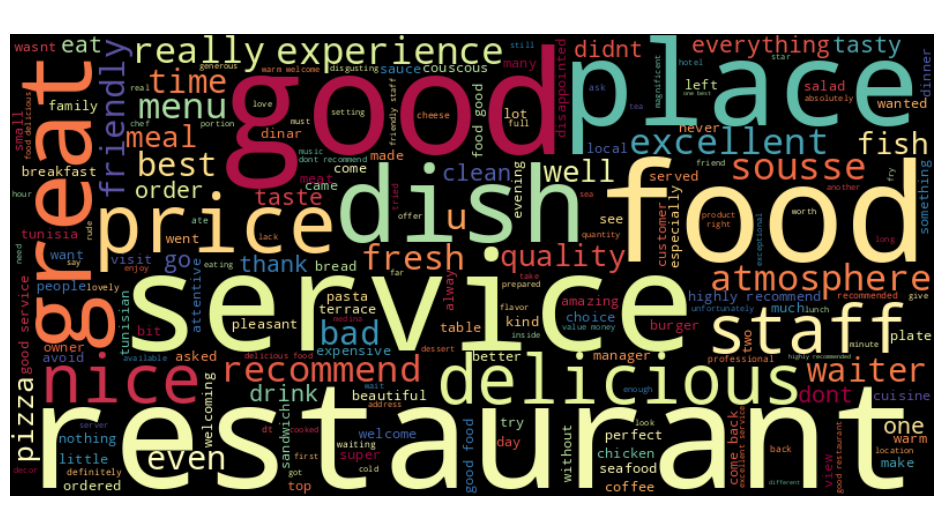

In [34]:
# 4. Perform Basic Text Analysis - Word Cloud
# Combine all cleaned reviews into a single string
all_reviews = ' '.join(df['caption'])

# Generate a word cloud with a unique color scheme
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Spectral',
    contour_color='white',
    contour_width=1,
    random_state=42  # Ensures reproducibility
).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Reviews', fontsize=16, color='white')
plt.show()

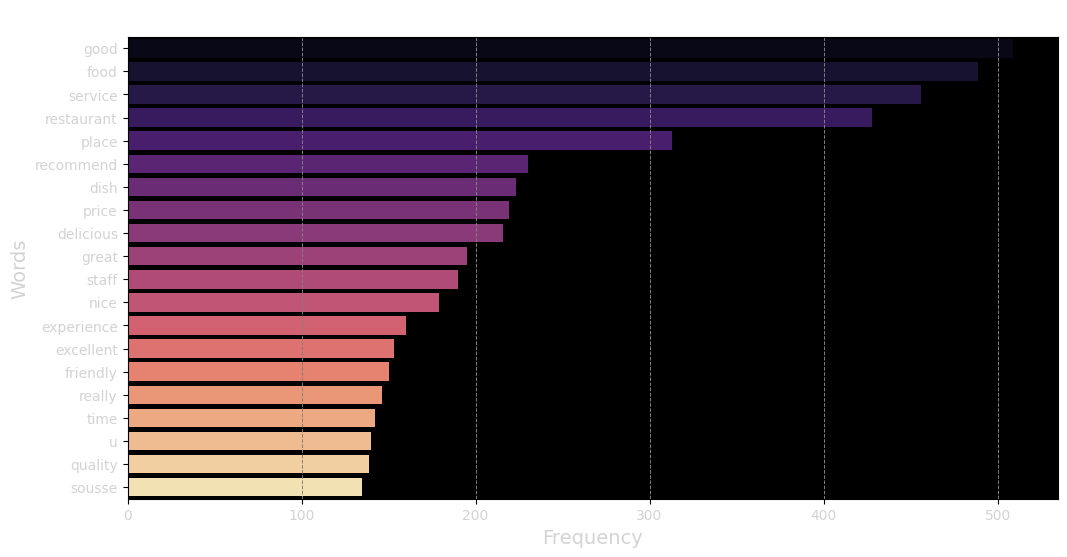

In [39]:
# Tokenize the cleaned review body
all_words = ' '.join(df['caption']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words (e.g., top 20)
most_common_words = word_counts.most_common(20)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words with a vibrant color palette and custom styling
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, hue='Word', palette='magma', errorbar=None, legend=False)
plt.title('Most Common Words in Reviews', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Frequency', fontsize=14, color='lightgray')
plt.ylabel('Words', fontsize=14, color='lightgray')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
plt.xticks(color='lightgray')
plt.yticks(color='lightgray')
plt.gca().set_facecolor('black')  # Set the background color to black
plt.show()
